In [238]:
import sys
sys.path.insert(0, 'src/')
from data_preprocessing import *
import pickle

In [239]:
sd = pd.read_csv('ca_san_diego_2020_04_01.csv')

In [240]:
'model_results/model_36months_v2.pkl'

'model_results/model_36months_v2.pkl'

In [243]:
res_lst = []
ob = 0.9
ob_pct = int(ob*100)
version = 4
# extra_str = '_v{version}.'
extra_str = '_fruitful_no_salient'
with open(f'model_results/model_36months_ob_{ob_pct}{extra_str}.pkl', 'rb') as f:
    svm_dict = pickle.load(f)
#     print(pd.Series(svm))
with open(f'model_results/X_tests_ob_{ob_pct}{extra_str}.pkl', 'rb') as f:
    X_tests = pickle.load(f)
with open(f'model_results/y_tests_ob_{ob_pct}{extra_str}.pkl', 'rb') as f:
    y_tests = pickle.load(f)
with open(f'model_results/X_filts_ob_{ob_pct}{extra_str}.pkl', 'rb') as f:
    X_filts = pickle.load(f)

In [244]:
weekdays=[x+'day' for x in ['Sun', 'Mon', 'Tues', 'Wednes', 'Thurs', 'Fri', 'Satur']]
day_of_week_dict = dict(zip(range(7), weekdays))

time_of_day = {i:'Morning' for i in range(24) if i in list(range(5, 12))}
time_of_day.update({i:'Afternoon' for i in range(24) if i in list(range(12, 18))})
time_of_day.update({i:'Evening' for i in range(24) if i in list(range(18, 24))})
time_of_day.update({i:'Overnight' for i in range(24) if i in list(range(6))})

In [245]:
X, y = preprocessing_data(X_filts[1])

In [246]:
y.sum()/len(y)

0.7768123459992219

In [247]:
import numpy as np

In [248]:
set(X_filts[0][0].columns) - set(X_test.columns)

set()

In [249]:
from sklearn.metrics import precision_score, accuracy_score

In [250]:
# X_test

In [251]:
y_test

305918     True
312937     True
311500    False
305670    False
308961     True
          ...  
307762     True
312421     True
311834     True
309865     True
306575     True
Name: search_conducted, Length: 3366, dtype: bool

In [252]:
X, y = preprocessing_data(X_filts[1])

In [253]:
len(sorted(y.index))

7711

In [254]:
y

19702     True
13386     True
19273     True
16030     True
22516     True
         ...  
19481    False
18595    False
13150    False
19654     True
12042     True
Name: search_conducted, Length: 7711, dtype: bool

In [255]:
prec_scores = []
preds = []
for t in range(35):
    svm = svm_dict[t]
    X_test, y_test = preprocessing_data(X_filts[t+1])
    missed_cols = list(set(X_filts[0][0].columns) - set(X_test.columns))
    print(missed_cols)
    for col in missed_cols:
        X_test.insert(int(np.where(X_filts[0][0].columns==col)[0][0]), col, np.zeros(len(X_test)))
    y_pred = svm.predict(X_test)
    preds.append(y_pred)
    prec_scores.append(precision_score(y_test, y_pred))
    print(f'Model Performance: {accuracy_score(y_test, y_pred)}')

[]


ValueError: X.shape[1] = 29 should be equal to 22, the number of features at training time

In [256]:
t = 30
svm = svm_dict[t]
X_test, y_test = preprocessing_data(X_filts[t+1])
missed_cols = list(set(X_filts[0][0].columns) - set(X_test.columns))
print(missed_cols)
for col in missed_cols:
    X_test.insert(int(np.where(X_filts[0][0].columns==col)[0][0]), col, np.zeros(len(X_test)))

[]


In [257]:
race_acc = {}
for t in range(35):
    race_acc[t] = X_filts[t+1].groupby('subject_race').apply(lambda x: sum(x['fruitful_search']==x['pred_fruitful_search'])/len(x)).to_dict()

In [258]:
race_fpr = {}
for t in range(35):
    race_fpr[t] = X_filts[t+1].groupby('subject_race').apply(lambda x: sum((x['fruitful_search']==0) & (x['pred_fruitful_search']==1))/len(x)).to_dict()

In [259]:
race_fpr_df = pd.DataFrame(race_fpr).T.rolling(5, min_periods=1).mean()
race_acc_df = pd.DataFrame(race_acc).T.rolling(5, min_periods=1).mean()

In [260]:
# pd.concat([race_fpr_df[i] for i in race_fpr_df.columns], axis=0).to_frame()

In [261]:
def get_plottable_race_df(race_df, name='prop'):
    race_sns = pd.concat([race_df[i] for i in race_df.columns], axis=0).to_frame()
    race_lst = [[i]*35 for i in race_df.columns]
    race_sns['race'] = [r for race in race_lst for r in race]
    race_sns = race_sns.rename(columns={0:name}).reset_index()
    return race_sns

In [262]:
race_fpr_sns = get_plottable_race_df(race_fpr_df, name='FPR')
race_acc_sns = get_plottable_race_df(race_acc_df, name='ACC')

In [263]:
race_fpr_sns = race_fpr_sns.loc[race_fpr_sns['race']!='other']

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

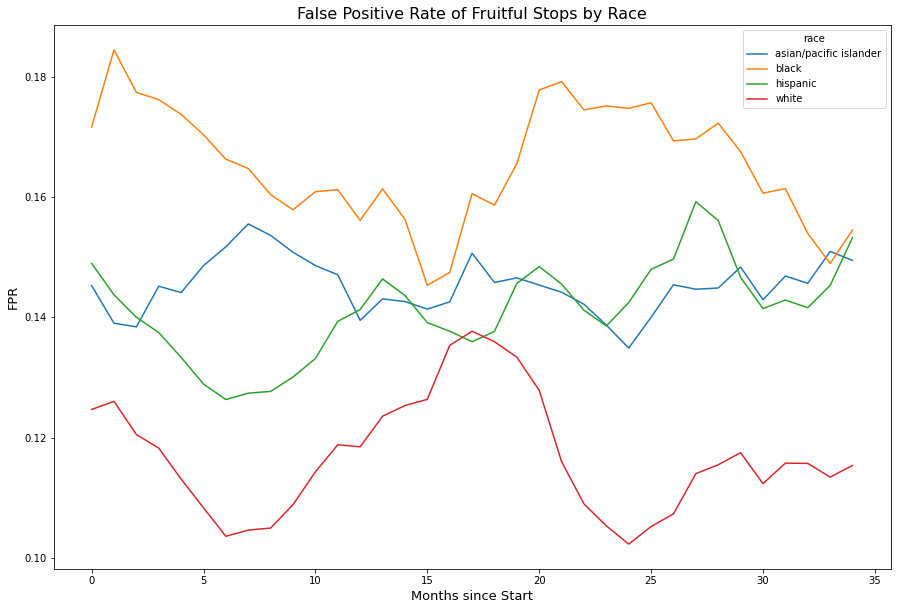

In [265]:
plt.figure(figsize=(15, 10))
plt.title('False Positive Rate of Fruitful Stops by Race', fontsize=16)
plt.xlabel('Months since Start', fontsize=13)
plt.ylabel('FPR', fontsize=13)
sns.lineplot(data=race_fpr_sns, x='index', y='FPR', hue='race');
plt.savefig(f'figures/fpr_by_race_roll_5{extra_str}_ob_{ob_pct}.png', dpi=900, bbox_inches='tight');

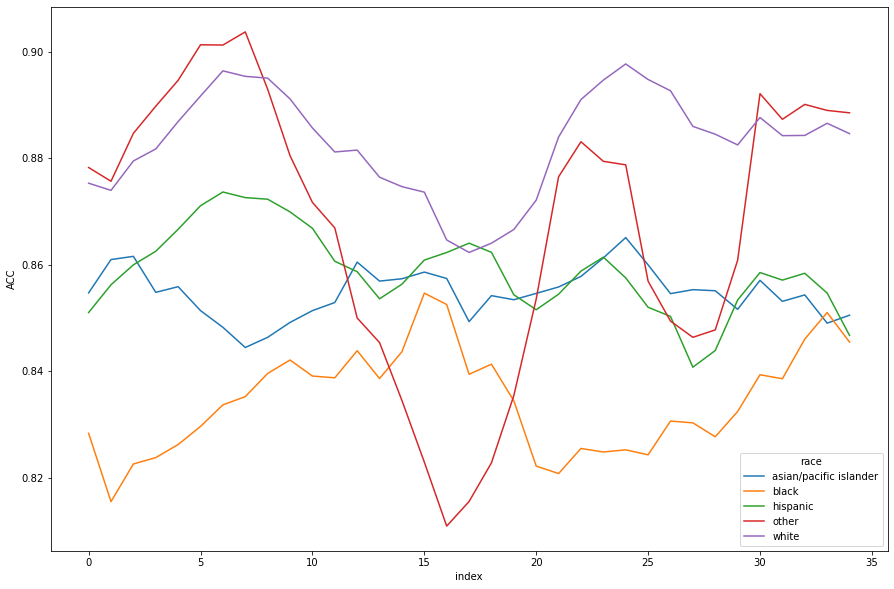

In [266]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=race_acc_sns, x='index', y='ACC', hue='race');

In [108]:
X_test

,subject_age,isWeekday,subject_race_asian/pacific islander,subject_race_black,subject_race_hispanic,subject_race_other,subject_race_white,subject_sex_female,subject_sex_male,weekday_Friday,...,division_NORTHEASTERN,division_SOUTHEASTERN,time_of_day_Afternoon,division_NORTHERN,time_of_day_Evening,division_NORTHWESTERN,division_SOUTHERN,division_WESTERN,time_of_day_Morning,time_of_day_Overnight
310399,0.393319,False,0,0,1,0,0,1,0,0,...,0.0,0,0,0.0,1,0.0,0.0,0.0,0,0
308871,-0.425628,True,0,0,1,0,0,0,1,0,...,0.0,0,1,0.0,0,0.0,0.0,0.0,0,0
309532,-0.127829,True,1,0,0,0,0,1,0,0,...,0.0,0,1,0.0,0,0.0,0.0,0.0,0,0
311202,0.840017,True,0,0,0,0,1,0,1,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
309425,0.691118,True,0,0,1,0,0,0,1,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310498,-0.872326,True,0,1,0,0,0,0,1,0,...,0.0,1,0,0.0,0,0.0,0.0,0.0,1,0
310223,-0.276728,False,0,0,0,0,1,0,1,0,...,0.0,1,0,0.0,0,0.0,0.0,0.0,1,0
312154,-0.574527,False,0,1,0,0,0,0,1,0,...,0.0,1,1,0.0,0,0.0,0.0,0.0,0,0
310980,-0.872326,True,0,0,1,0,0,0,1,0,...,0.0,1,0,0.0,0,0.0,0.0,0.0,1,0


In [43]:
prec_scores_ob_75 = prec_scores.copy()

In [45]:
np.mean(prec_scores_ob_75)

0.9921929283643826

In [37]:
# prec_scores_ob_100 = prec_scores.copy()

In [46]:
np.mean(prec_scores_ob_100)

0.8744732174942087